### 제2절. 이상치 확인 및 정제

#### 2. 이상치 확인

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['class'] = wine_load.target
wine['class'] = wine['class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


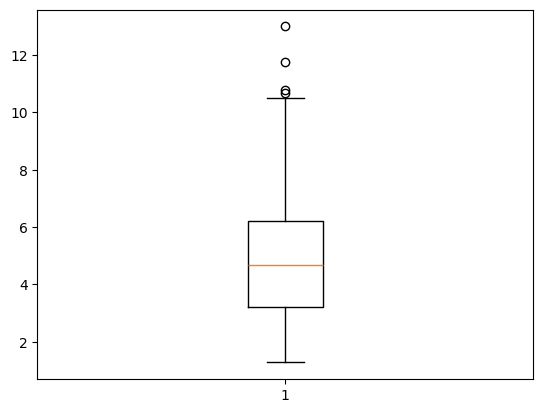

In [4]:
plt.boxplot(wine['color_intensity'])
plt.show()

In [5]:
import numpy as np

def outliter_iqr(df, col) -> pd.DataFrame :
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_whisker = q1 - (iqr * 1.5)
    upper_whisker = q3 + (iqr * 1.5)
    outliers = df[(df[col] > upper_whisker) | (df[col] < lower_whisker)]

    return outliers[[col]]

outliers = outliter_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


#### 3. 이상치 정제

In [6]:
drop_outliers = wine.drop(index=outliers.index)

print("original: ", wine.shape)


Index([151, 158, 159, 166], dtype='int64')